# MNIST Jupyter Notebook
# by Troy Samra
# CSCI 191T Machine Learning

In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [64]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print ("Train data shape:", train.shape) # to understand the size of the data that I am working with

print ("Test data shape:", test.shape)

Train data shape: (42000, 785)
Test data shape: (28000, 784)


In [65]:
train.head() # to get a visualization of the data on the train set

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
test.head()  # to get a visualization of the data on the test set

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
labeled_images = pd.read_csv('train.csv') 

images = labeled_images.iloc[0:5000,1:] # capture only the first 5000 images for training purposes

labels = labeled_images.iloc[0:5000,:1] # capture only the first 5000 labels for training purposes

train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Text(0.5,1,'9')

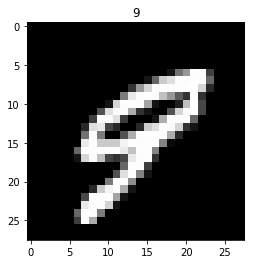

In [68]:
i = 49 # lets display an image so we can get a sense of what we are working with
img = train_images.iloc[i].values 
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train_labels.iloc[i, 0])

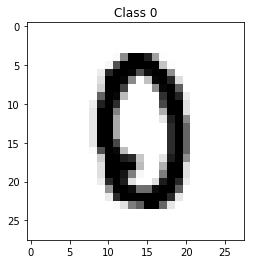

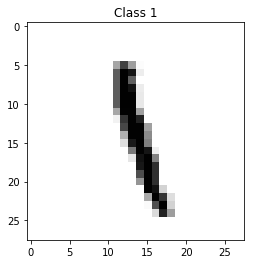

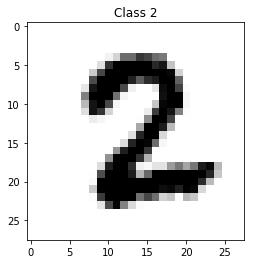

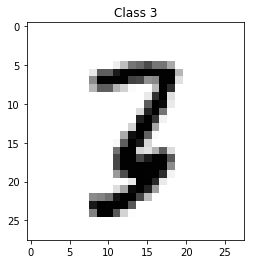

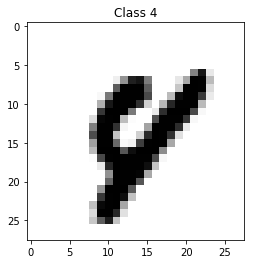

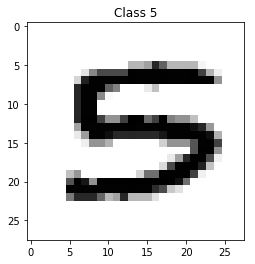

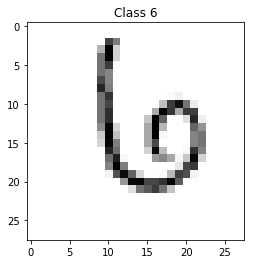

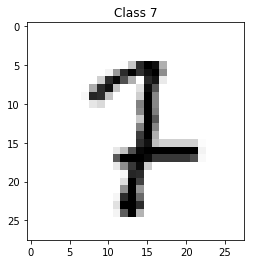

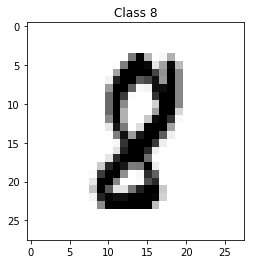

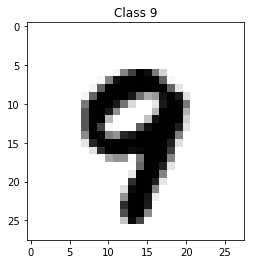

In [69]:
# Find unique labels from train_labels and stored the index of unique labels into array.
Index = train_labels.drop_duplicates(subset='label') # drop duplicate labels

Index = Index.sort_values(by=['label']) # sort by their labels

Index = Index.index.values # store the values

Classes = [] # create a class array

x = 0
y = 0 # create counters

while len(Classes) < len(Index): # if Classes is less than the size of Index
    if train_labels.index[x] == Index[y]:
        Classes.append(x) # add to classes
        x = 0
        y += 1
    else:
        x += 1

# Plot images from each class to see 1-9 classes
for i in Classes:
    plt.figure()
    
    img = train_images.iloc[i].values
    
    img = img.reshape((28,28))
    
    plt.imshow(img,cmap='binary')
    
    title = "Class " + str(train_labels.iloc[i,0])
    
    plt.title(title)

(array([631.,  13.,  12.,   5.,  12.,   7.,   8.,  10.,  13.,  73.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

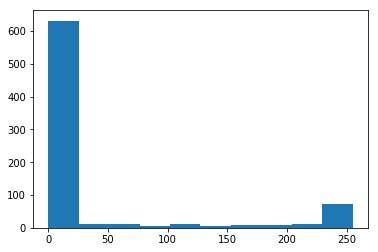

In [70]:
i = 49
plt.hist(train_images.iloc[i])

In [71]:
# Need to train the model
model = svm.SVC()
model.fit(train_images, train_labels.values.ravel())
model.score(test_images,test_labels)

0.1

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Text(0.5,1,'label    7\nName: 2913, dtype: int64')

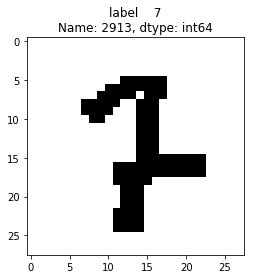

In [72]:
train_images[train_images > 0] = 1 # resize to be 0-1 for better training on the data
test_images[test_images > 0] = 1

i = 0 # Display another image
img = train_images.iloc[i].values
img = img.reshape(28,28)
plt.imshow(img, cmap = 'binary')
plt.title(train_labels.iloc[i])

# Not sure how to get ride of these warnings, but they do not effect results

(array([671.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 113.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

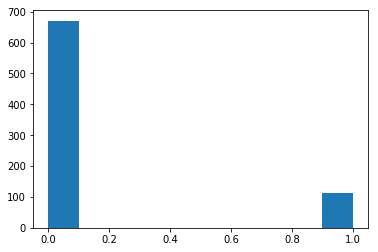

In [73]:
plt.hist(train_images.iloc[i]) # Show the new range of data

In [74]:
# train the model again on this new range of data
model = svm.SVC()
model.fit(train_images, train_labels.values.ravel())
model.score(test_images,test_labels)

# Notice we get a much better score

0.887

In [75]:
# do the same to the test set
test[test > 0] = 1

# Gather our results from the model predictions
results = model.predict(test[0:28000]) # for the entire dataset that kaggle expects in the submission

In [76]:
results #display the results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [77]:
# transform the results into a .csv for submission
data = pd.DataFrame(results)
data.index += 1
data.index.name = 'ImageId'
data.columns = ['Label']
data.to_csv('results.csv', header = True)